# Load Data and Libraries

In [2]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from keras import models

In [3]:
#Load data in, keras already has it train-test split
(trainX,trainY), (testX, testY) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


5
5


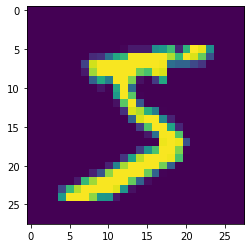

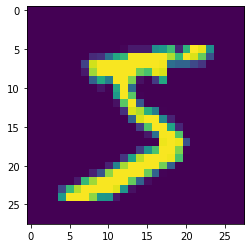

In [4]:
plt.imshow(trainX[0])
print(trainY[0])

# Preprocessing

In [5]:
#Reshape and scale the features
trainX = trainX.reshape((trainX.shape[0], 28*28))
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)

testX = testX.reshape((testX.shape[0], 28*28))
scaler = StandardScaler()
scaler.fit(testX)
testX = scaler.transform(testX)

trainY =  keras.utils.to_categorical(trainY, 10)
testY =  keras.utils.to_categorical(testY, 10)


In [6]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build Models

In [7]:
#Build model
fct = 'relu'
model = models.Sequential()

model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(trainX, trainY, epochs = 10)


2021-10-13 11:28:30.339000: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-13 11:28:30.339000: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-13 11:28:30.630442: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-13 11:28:30.630442: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.1698
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accur

In [8]:
#Build model
fct = 'sigmoid'
model = models.Sequential()

model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10)

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3141 - accuracy: 0.9132 - val_loss: 0.1829 - val_accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1327 - accuracy: 0.9612 - val_loss: 0.1327 - val_accuracy: 0.9613
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - accuracy: 0.9754 - val_loss: 0.1125 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0560 - accuracy: 0.9850 - val_loss: 0.1056 - val_accuracy: 0.9697
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0378 - accuracy: 0.9907 - val_loss: 0.1007 - val_accuracy: 0.9711
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9945 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9968 - val_loss: 0.0964 - va

In [9]:
#Build model
fct = 'softmax'
model = models.Sequential()

model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(trainX, trainY, epochs = 10)

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6721 - accuracy: 0.7866
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6721 - accuracy: 0.7866
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.9309
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.9406
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.9470
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2412 - accuracy: 0.9519
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9551
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2037 - accuracy: 0.9579
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1923 - accuracy: 0.9600
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - l

# Optimizing Model

In [12]:
def model(fct,lr):
#Build model
    model = models.Sequential()

    model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
    model.add(layers.Dense(128, activation=fct))
    model.add(layers.Dense(10, activation=fct))

    #Make exponential learning rate
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        lr,
        decay_steps=1000,
        decay_rate=0.9,
        staircase=False)

    #Define optimizer
    opt = keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compile model
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    # Train model
    history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10, verbose = 0)
    return history

In [21]:
#Sigmoid function was the best in the previous models, so that will be used here
lr = [1.0,.1,.01,.001,.0001,.00001]
loss = []
for i in range(0,len(lr)):
    history = model('sigmoid',lr[i])
    loss.append(history.history['loss'][-1])
    


Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 21.3180 - accuracy: 0.0992 - val_loss: 17.6868 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 15.9132 - accuracy: 0.1017 - val_loss: 12.0165 - val_accuracy: 0.1009
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 11.6269 - accuracy: 0.0989 - val_loss: 9.0179 - val_accuracy: 0.0974
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 8.2857 - accuracy: 0.0982 - val_loss: 4.0304 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 6.1125 - accuracy: 0.0996 - val_loss: 5.4968 - val_accuracy: 0.1009
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5933 - accuracy: 0.0978 - val_loss: 4.3089 - val_accuracy: 0.1010
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.0071 - accuracy: 0.1008 - val_loss: 3.0

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1147 - accuracy: 0.9642 - val_loss: 0.1383 - val_accuracy: 0.9595
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0832 - accuracy: 0.9736 - val_loss: 0.1357 - val_accuracy: 0.9592
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9813 - val_loss: 0.1285 - val_accuracy: 0.9636
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0454 - accuracy: 0.9851 - val_loss: 0.1195 - val_accuracy: 0.9669
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.1244 - val_accuracy: 0.9658
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.1249 - val_accuracy: 0.9674
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.1243 - val_accuracy: 0.9694
E

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2294 - accuracy: 0.9347 - val_loss: 0.2311 - val_accuracy: 0.9331
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2165 - accuracy: 0.9384 - val_loss: 0.2231 - val_accuracy: 0.9356
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2072 - accuracy: 0.9406 - val_loss: 0.2165 - val_accuracy: 0.9374
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9428 - val_loss: 0.2119 - val_accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1946 - accuracy: 0.9444 - val_loss: 0.2083 - val_accuracy: 0.9393
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1902 - accuracy: 0.9454 - val_loss: 0.2054 - val_accuracy: 0.9399
Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0165 - accuracy: 0.4900 - val_loss: 1.7093 - val_accura

Loss shoots back up at a learning rate of .00001
Loss shoots back up at a learning rate of .00001


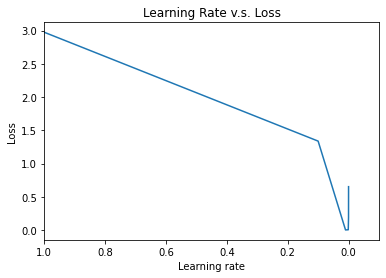

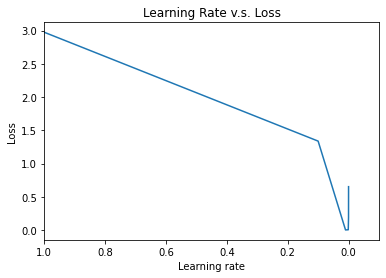

In [31]:
plt.plot(lr,loss)
plt.xlim(1,-.1)
plt.title("Learning Rate v.s. Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss");
print("Loss shoots back up at a learning rate of .00001")

In [43]:
Loss =[]
#Adam 
#Build model
fct = 'sigmoid'
model = models.Sequential()
model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .0001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10)
Loss.append(history.history['loss'][-1])

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8865 - accuracy: 0.8137 - val_loss: 0.4164 - val_accuracy: 0.9042
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3504 - accuracy: 0.9095 - val_loss: 0.3026 - val_accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.9225 - val_loss: 0.2648 - val_accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2491 - accuracy: 0.9297 - val_loss: 0.2444 - val_accuracy: 0.9302
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2304 - accuracy: 0.9347 - val_loss: 0.2328 - val_accuracy: 0.9325
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2177 - accuracy: 0.9379 - val_loss: 0.2241 - val_accuracy: 0.9349
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2084 - accuracy: 0.9406 - val_loss: 0.2181 - va

In [44]:
#Build model
#SGD
fct = 'sigmoid'
model = models.Sequential()
model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .0001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.SGD(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10)
Loss.append(history.history['loss'][-1])   

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3444 - accuracy: 0.1130 - val_loss: 2.3035 - val_accuracy: 0.1171
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2886 - accuracy: 0.1278 - val_loss: 2.2750 - val_accuracy: 0.1384
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2690 - accuracy: 0.1532 - val_loss: 2.2615 - val_accuracy: 0.1635
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2583 - accuracy: 0.1770 - val_loss: 2.2531 - val_accuracy: 0.1851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2512 - accuracy: 0.1968 - val_loss: 2.2470 - val_accuracy: 0.2052
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2459 - accuracy: 0.2152 - val_loss: 2.2423 - val_accuracy: 0.2197
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2418 - accuracy: 0.2304 - val_loss: 2.2386 - va

In [45]:
#Build model
#RMSprop
fct = 'sigmoid'
model = models.Sequential()
model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .0001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.RMSprop(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10)
Loss.append(history.history['loss'][-1])

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8152 - accuracy: 0.8271 - val_loss: 0.3896 - val_accuracy: 0.8995
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3379 - accuracy: 0.9087 - val_loss: 0.3006 - val_accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2830 - accuracy: 0.9189 - val_loss: 0.2697 - val_accuracy: 0.9231
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2581 - accuracy: 0.9244 - val_loss: 0.2531 - val_accuracy: 0.9275
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2428 - accuracy: 0.9288 - val_loss: 0.2429 - val_accuracy: 0.9290
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2321 - accuracy: 0.9322 - val_loss: 0.2355 - val_accuracy: 0.9305
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2243 - accuracy: 0.9342 - val_loss: 0.2298 - va

In [46]:
#Build model
#Adagrad
fct = 'sigmoid'
model = models.Sequential()
model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .0001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adagrad(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10)
Loss.append(history.history['loss'][-1])

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4045 - accuracy: 0.0993 - val_loss: 2.3295 - val_accuracy: 0.1031
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.1000 - val_loss: 2.2795 - val_accuracy: 0.1040
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2667 - accuracy: 0.1033 - val_loss: 2.2525 - val_accuracy: 0.1103
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2445 - accuracy: 0.1185 - val_loss: 2.2343 - val_accuracy: 0.1352
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2289 - accuracy: 0.1537 - val_loss: 2.2208 - val_accuracy: 0.1818
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2170 - accuracy: 0.2056 - val_loss: 2.2104 - val_accuracy: 0.2506
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2079 - accuracy: 0.2873 - val_loss: 2.2022 - va

In [49]:
optimizers = ["Adam","SGD","RMSprop","Adagrad"]
pd.DataFrame(np.array([optimizers,Loss]).T,columns = ['Optimizers','Loss'])

,Optimizers,Loss
0,Adam,0.1916702538728714
1,SGD,2.2336618900299072
2,RMSprop,0.21023355424404144
3,Adagrad,2.190291404724121


,Optimizers,Loss
0,Adam,0.1916702538728714
1,SGD,2.2336618900299072
2,RMSprop,0.21023355424404144
3,Adagrad,2.190291404724121


In [ ]:
#Early Stopping
#Build model
#SGD
fct = 'sigmoid'
model = models.Sequential()
model.add(layers.Dense(256, activation=fct, input_shape=(28*28,)))
model.add(layers.Dense(128, activation=fct))
model.add(layers.Dense(10, activation=fct))

#Make exponential learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    .0001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False)

#Define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

# Compile model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(trainX, trainY,validation_data =(testX,testY) ,epochs = 10,callbacks = [callback])

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8599 - accuracy: 0.8213 - val_loss: 0.4077 - val_accuracy: 0.9027
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3470 - accuracy: 0.9100 - val_loss: 0.2995 - val_accuracy: 0.9160
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.9219 - val_loss: 0.2630 - val_accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2487 - accuracy: 0.9290 - val_loss: 0.2443 - val_accuracy: 0.9313
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2300 - accuracy: 0.9343 - val_loss: 0.2314 - val_accuracy: 0.9335
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2174 - accuracy: 0.9375 - val_loss: 0.2227 - val_accuracy: 0.9359
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2081 - accuracy: 0.9402 - val_loss: 0.2166 - v